In [241]:
import numpy as np
import matplotlib.pyplot as plt

In [242]:
n0=1
k=1.381e-23
T0=0
m0=4*1.66054e-27
m=9.11e-31
E=1e-21*n0
q=1.602e-19

In [243]:
n=5000
B=np.zeros((n,1))
A=np.zeros((n,n))

vmin=1e3
vmax=2*np.sqrt(24*1.602e-19/m)
v=np.logspace(np.log10(vmin),np.log10(vmax),n)
v=np.reshape(v,(n,1))

dv=v[:n-1]-v[1:]#v*((np.sqrt(24*1.602e-19/m)/1e-10)**(1/(n-1))-1)

In [244]:
def vm(v):
    return 5e-20*n0*np.sqrt(2/m*1.6e-19)
def dvm(v):
    return 0

In [245]:
def a(v):
    return q**2*E**2/(3*vm(v)*m**2) + k*T0*vm(v)/m0
def b(v):
    return (k*T0*(2*v*vm(v)+v**2*dvm(v))/m + v**3*vm(v))*m/(m0*v**2) -q*E*(v**2*q*E*dvm(v)/(m*vm(v)**2) - 2*v*q*E/(m*vm(v)))/(3*m*v**2)
def c(v):
    return m*((2*v*vm(v)+v**2*dvm(v))*v + v**2*vm(v))/(m0*v**2)

In [246]:
def f1(f,g,v):
    return g
def f2(f,g,v):
    return -b(v)*g/a(v)-c(v)*f/a(v)

[  1.97061141e-08] [  1.95372527e-11] [  1.96897592e-08] [  1.96897592e-08] [  1.95371902e-11] [  1.96897592e-08] [  1.95371901e-11] [  1.96734043e-08] [  1.95371275e-11] 1.0 -1.17702387001e-08
[  1.96406846e-08] [  1.95046345e-11] [  1.96243842e-08] [  1.96243842e-08] [  1.95045718e-11] [  1.96243842e-08] [  1.95045717e-11] [  1.96080838e-08] [  1.95045088e-11] 1.0 -1.17507012786e-08
[  1.95754727e-08] [  1.94720701e-11] [  1.95592265e-08] [  1.95592265e-08] [  1.94720072e-11] [  1.95592266e-08] [  1.94720071e-11] [  1.95429804e-08] [  1.94719440e-11] 1.0 -1.17311964767e-08
[  1.95104777e-08] [  1.94395594e-11] [  1.94942856e-08] [  1.94942856e-08] [  1.94394963e-11] [  1.94942856e-08] [  1.94394962e-11] [  1.94780936e-08] [  1.94394329e-11] 1.0 -1.17117242405e-08


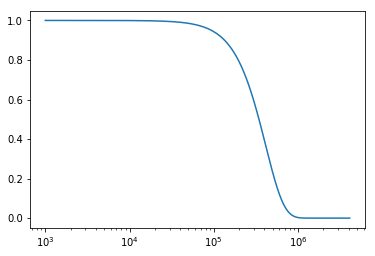

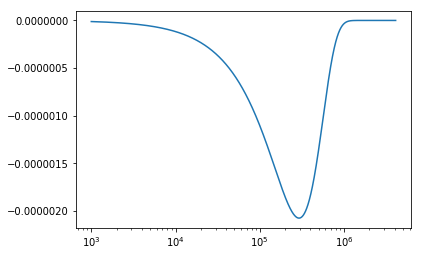

In [247]:
f=np.zeros(n)
g=-np.ones(n)
for i in range(n-1,0,-1):
    k11=dv[i-1]*f1(f[i],g[i],v[i])
    k21=dv[i-1]*f2(f[i],g[i],v[i])
    k12=dv[i-1]*f1(f[i]+0.5*k11,g[i]+0.5*k21,v[i]+0.5*dv[i-1])
    k22=dv[i-1]*f2(f[i]+0.5*k11,g[i]+0.5*k21,v[i]+0.5*dv[i-1])
    k13=dv[i-1]*f1(f[i]+0.5*k12,g[i]+0.5*k22,v[i]+0.5*dv[i-1])
    k23=dv[i-1]*f2(f[i]+0.5*k12,g[i]+0.5*k22,v[i]+0.5*dv[i-1])
    k14=dv[i-1]*f1(f[i]+k13,g[i]+k23,v[i]+dv[i-1]) #v[i-1]) #v[i]+dv[i]);
    k24=dv[i-1]*f2(f[i]+k13,g[i]+k23,v[i]+dv[i-1]) #v[i-1]) #v[i]+dv[i]);
    f[i-1]=f[i]+(k11+2*k12+2*k13+k14)/6
    g[i-1]=g[i]+(k21+2*k22+2*k23+k24)/6
    norm=np.max(np.abs(f)) #max(np.max(np.abs(f)),np.max(np.abs(g)))
    #print(np.max(np.abs(f)),np.max(np.abs(g)))
    if i<5:
        print(k11,k21,k12,k12,k22,k13,k23,k14,k24,f[i],g[i])
    f=f/norm
    g=g/norm


plt.semilogx(v,f)
plt.show()
plt.semilogx(v,g)
plt.show()

(4999, 1)


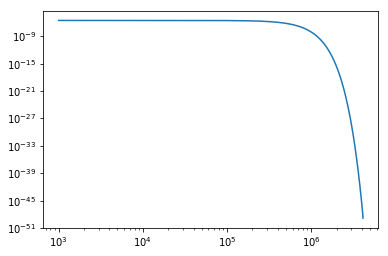

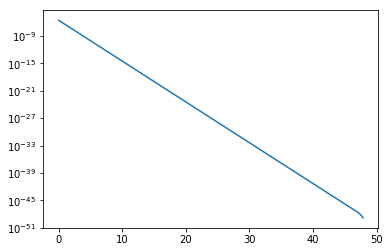

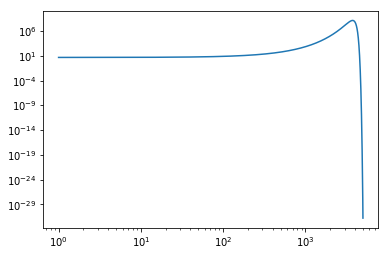

0.732927684894


In [248]:
f=np.reshape(f[:n-1],(n-1,1))
g=np.reshape(g[:n-1],(n-1,1))
dv=-dv
v=v[:n-1]

f0=f/np.sum(f*dv) #Normalising f0

print(np.shape(dv))
plt.loglog(v,f0)
plt.show()
plt.semilogy(0.5*m*v**2/q,f0)
plt.show()

eps=np.sum(0.5*m*v**2*f0*dv)*3
plt.loglog(v**2*f0*dv)
plt.show()
print(eps/1.6e-19)

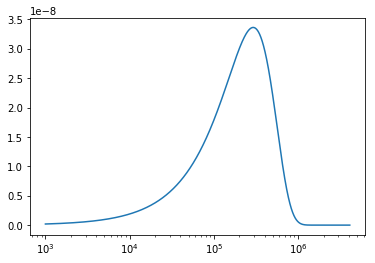

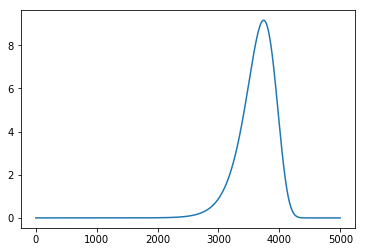

0.595036275048


In [249]:
f1=-q*E*g/(m*vm(v))/np.sum(f*dv) #Normalising f1
plt.semilogx(v,f1)
plt.show()

W=np.sum(dv*f1*v)
plt.plot(dv*f1*v)
plt.show()
print(W/1e4)

3.47841351506e-07


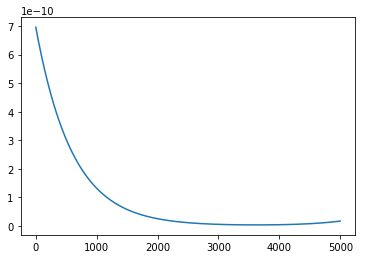

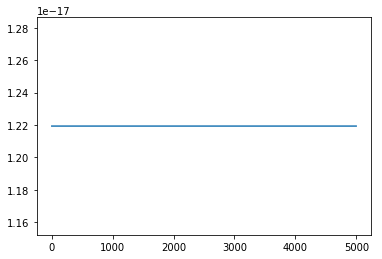

In [250]:
print(a(v))
plt.plot(b(v))
plt.show()
plt.plot(c(v))
plt.show()

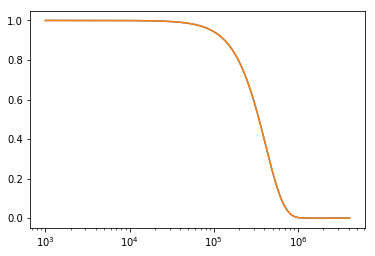

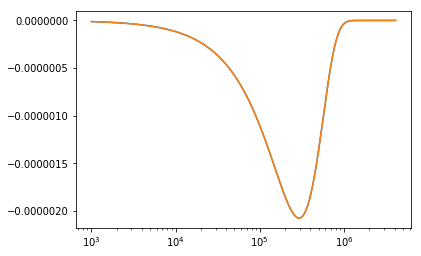

In [254]:
ax=3*m**3*vm(v)**2/q**2/E**2/m0
f_anyl=np.exp(-ax*v**2/2)
plt.semilogx(v,f_anyl)
plt.semilogx(v,f)
plt.show()
g_anyl=-ax*v*np.exp(-ax*v**2/2)
plt.semilogx(v,g_anyl)
plt.semilogx(v,g)
plt.show()

In [252]:
W0=0.593e4
eps0=0.7291*1.6e-19
print(100*(1-W0/W),100*(1-eps0/eps))

0.342210237203 0.522245915031
